In [ ]:
import re
import kagglehub

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading Dataset from Kaggle

In [ ]:
# Download latest version
path = kagglehub.dataset_download("amruthjithrajvr/recruitment-scam")

print("Path to dataset files:", path)

c:\LocalOneDrive\Documents\Desktop\INTERNSHIPS\GovTech DS\GovTech_DS_GASP_Assessment\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 17.8M/17.8M [00:02<00:00, 9.33MB/s]

Extracting files...


Path to dataset files: C:\Users\teomi\.cache\kagglehub\datasets\amruthjithrajvr\recruitment-scam\versions\3


In [32]:
path = r"C:\Users\teomi\.cache\kagglehub\datasets\amruthjithrajvr\recruitment-scam\versions\3\DataSet.csv"
recruitment_df = pd.read_csv(path)
recruitment_df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,<p>Vend is looking for some awesome new talent...,<p>Just in case this is the first time you’ve ...,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...,<p><b>What can you expect from us?</b></p>\r\n...,f,t,t,Full-time,Mid-Senior level,NaN,Computer Software,Sales,f,f
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,<p>WebLinc is the e-commerce platform and serv...,<p></p>\r\n<p>The Payroll Accountant will focu...,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...,<p></p>\r\n<h3>Health &amp; Wellness</h3>\r\n<...,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,f,f
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,<p>We Provide Full Time Permanent Positions fo...,<p>Experienced Project Cost Control Staff Engi...,<ul>\r\n<li>At least 12 years professional exp...,NaN,f,f,f,Full-time,NaN,NaN,NaN,NaN,f,f
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,<p>Nemsia Studios is looking for an experience...,<p>1. Must be fluent in the latest versions of...,<p>Competitive salary (compensation will be ba...,f,f,t,Contract,Not Applicable,Professional,Graphic Design,Design,f,f


# 1. Exploratory Analysis

## 1A. Quality, Structure and Limitations of Dataset

In [8]:
recruitment_df.describe()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
count,17880,17534,6333,2868,14572,17880,15191,10684,17880,17880,17880,14409,10830,9775,12977,11425,17880,17880
unique,11231,3105,1337,874,1710,15095,12119,6510,2,2,2,5,7,13,131,37,2,2
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,<p>We help teachers get safe &amp; secure jobs...,"<p>Play with kids, get paid for it </p>\r\n<p>...",<p>University degree required. TEFL / TESOL / ...,<p>See job description</p>,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,f,f
freq,311,718,551,142,726,376,410,726,17113,14220,9088,11620,3809,5145,1734,1749,17014,16980


In [30]:
recruitment_df['telecommuting'].value_counts(), recruitment_df['has_company_logo'].value_counts(), recruitment_df['fraudulent'].value_counts()

(telecommuting
 f    17113
 t      767
 Name: count, dtype: int64,
 has_company_logo
 t    14220
 f     3660
 Name: count, dtype: int64,
 fraudulent
 f    17014
 t      866
 Name: count, dtype: int64)

In [40]:
recruitment_df['employment_type'].unique(), recruitment_df['required_experience'].unique(), recruitment_df['required_education'].unique(), recruitment_df['location'].unique()

(array(['Other', 'Full-time', nan, 'Part-time', 'Contract', 'Temporary'],
       dtype=object),
 array(['Internship', 'Not Applicable', nan, 'Mid-Senior level',
        'Associate', 'Entry level', 'Executive', 'Director'], dtype=object),
 array([nan, "Bachelor's Degree", "Master's Degree",
        'High School or equivalent', 'Unspecified',
        'Some College Coursework Completed', 'Vocational', 'Certification',
        'Associate Degree', 'Professional', 'Doctorate',
        'Some High School Coursework', 'Vocational - Degree',
        'Vocational - HS Diploma'], dtype=object),
 array(['US, NY, New York', 'NZ, , Auckland', 'US, IA, Wever', ...,
        'US, CA, los Angeles', 'CA, , Ottawa', 'GB, WSX, Chichester'],
       shape=(3106,), dtype=object))

The dataset provided is a labeled dataset, and for most binary columns (e.g. `telecommuting`, `has_company_logo`, `fradulent`) the values make sense i.e. there are 2 unique values - either 't' or 'f'. For categorical variables (e.g. `location`, `employment_type`, `required_experience` and `required_education`), the dataset has been cleaned and pre-processed well with unique values that have been formatted without duplicate entries across different cases.

In [26]:
recruitment_df.isnull().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                0
requirements            2689
benefits                7196
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
in_balanced_dataset        0
dtype: int64

For columns like `department` and `salary_range` where more than 70% of rows are null values, they are less useful as features for identifying fraudulent job advertisements.

In [27]:
recruitment_df.duplicated().sum()

np.int64(235)

There are a few duplicated rows in the dataset, of which repeated advertisements could be characteristic of fraudulent job advertisements. Hence, we do not remove these rows.

In [23]:
print(f"There are {len(recruitment_df[recruitment_df['fraudulent'] == 't'])} fraudulent job postings and {len(recruitment_df[recruitment_df['fraudulent'] == 'f'])} non-fraudulent job postings.")
print("This is a highly imbalanced dataset with less than 5% of job postings being fraudulent, which is common in fraud detection tasks.")

There are 866 fraudulent job postings and 17014 non-fraudulent job postings.
This is a highly imbalanced dataset with less than 5% of job postings being fraudulent, which is common in fraud detection tasks.


For fraud detection, the natural dataset is usually highly imbalanced with fraudulent job postings being rare. In the data preparation step for fraudulent detection, it is crucial to ensure that a balanced dataset is produced for subsequent training. In the dataset, there is a `in_balanced_dataset` column that indicates that there are 900 rows belonging to the balanced dataset which was tagged by the dataset creator. We use our own balancing strategy to create a balanced dataset.

Qn: What are some limiations of this dataset? 

## 1B. Useful Features for Identifying Fraudulent Job Advertisements

Based on intuition, some useful features of this dataset for fraud detection include:
1. `company_profile` -> non-fraudulent job advertisements are likely to include company profiles to establish credibility, hence we can explore the relationship between missing company profiles or short company profiles with whether the job advertisements are fraudulent or not;
2. `description` -> fraudulent job advertisements are likely to have vague job descriptions and are hence shorter, use consecutive punctuations or use language that over-promise;
3. `requirements` -> non-fraudulent job descriptions tend to have more detailed requirements while fraudulent ones tend to have vague requirements;
4. `benefits` -> fraudulent job descriptions tend to promise unusually high renumeration;
5. `has_company_logo` -> established companies are more likely to have a company logo;
6. `has_questions` -> fraudulent job advertisements are unlikely to have screening questions;
7. `employment_type` -> fraudulent job advertisements are likely to be part-time/freelance arrangements because these positions require less vigorous vetting;
8. `required_experience` and `required_education` -> fraudulent job advertisements are likely to require minimal experience and education attainment because these advertisements are meant to target a wider audience and have lower barriers to entry for higher probability of successful scams

## 1C. Identifying patterns, behaviours and signals through EDA

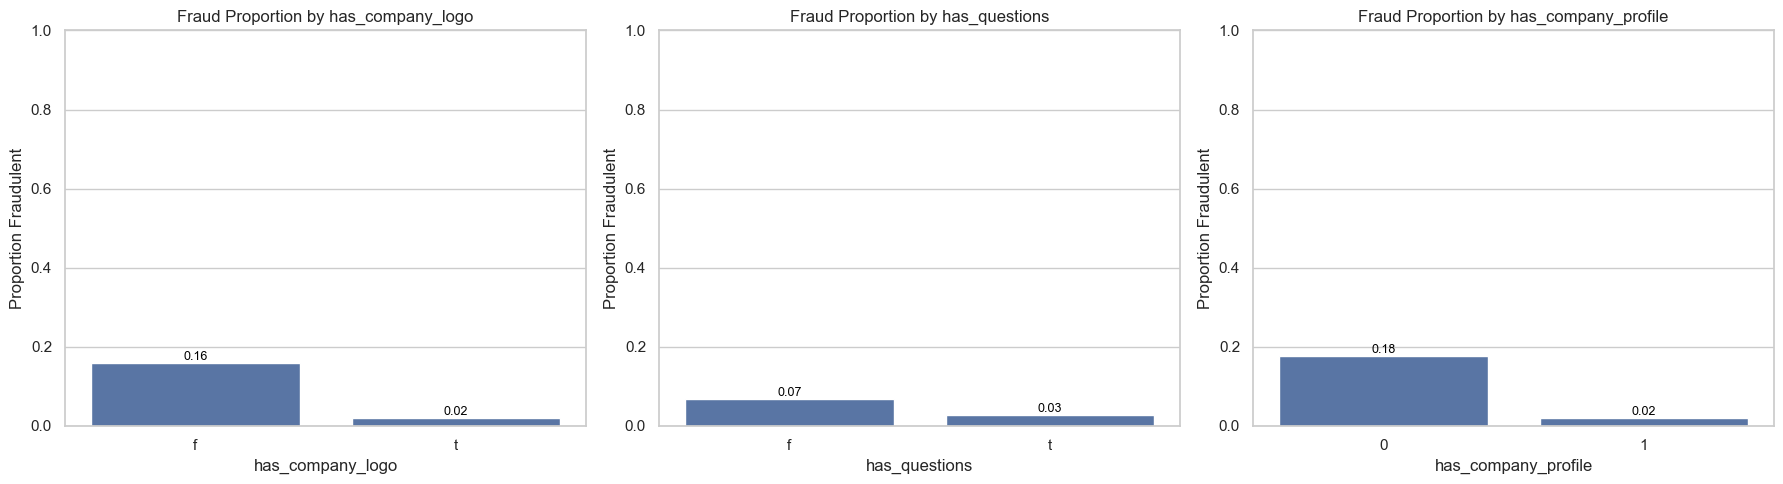

In [33]:
# Make sure binary column for company profile exists
recruitment_df['has_company_profile'] = recruitment_df['company_profile'].notnull().astype(int)

# Map fraud label nicely
fraud_map = {'t':1, 'f':0, 1:1, 0:0}
recruitment_df['fraudulent_bin'] = recruitment_df['fraudulent'].map(fraud_map)

# Categorical features to plot
cat_features = ['has_company_logo', 'has_questions', 'has_company_profile']

fig, axes = plt.subplots(1, len(cat_features), figsize=(18,5))

for i, col in enumerate(cat_features):
    # Compute fraud proportion for each category
    prop = recruitment_df.groupby(col)['fraudulent_bin'].mean().reset_index()

    # Plot vertical bars
    sns.barplot(x=col, y='fraudulent_bin', data=prop, ax=axes[i])
    axes[i].set_title(f"Fraud Proportion by {col}")
    axes[i].set_ylabel("Proportion Fraudulent")
    axes[i].set_ylim(0,1)  # always scale 0 to 1
    
    # Add text labels on top of bars
    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_height():.2f}",
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

From the barplots for the categorical variables `has_company_logo`, `has_questions` and `has_company_profile`, we can see that job advertisements with company logo, questions and an accompanying company profile has lower fraudulent rate than companies without. This is also a signal that these variables might be useful for identification of fraudulent job advertisements.

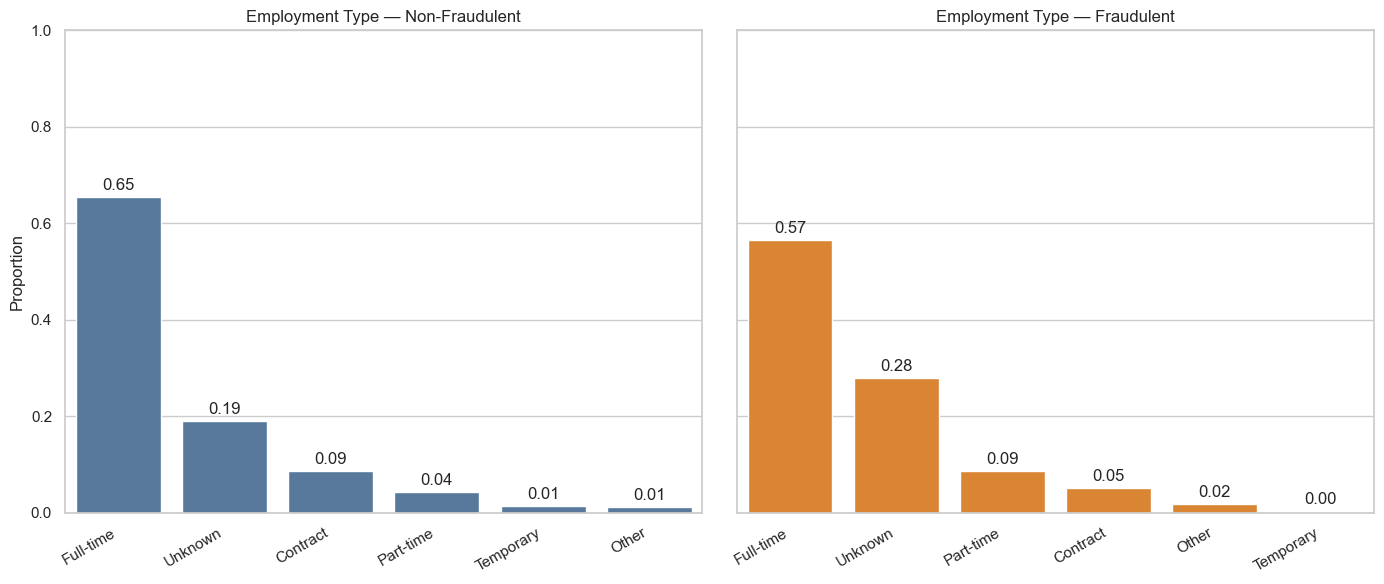

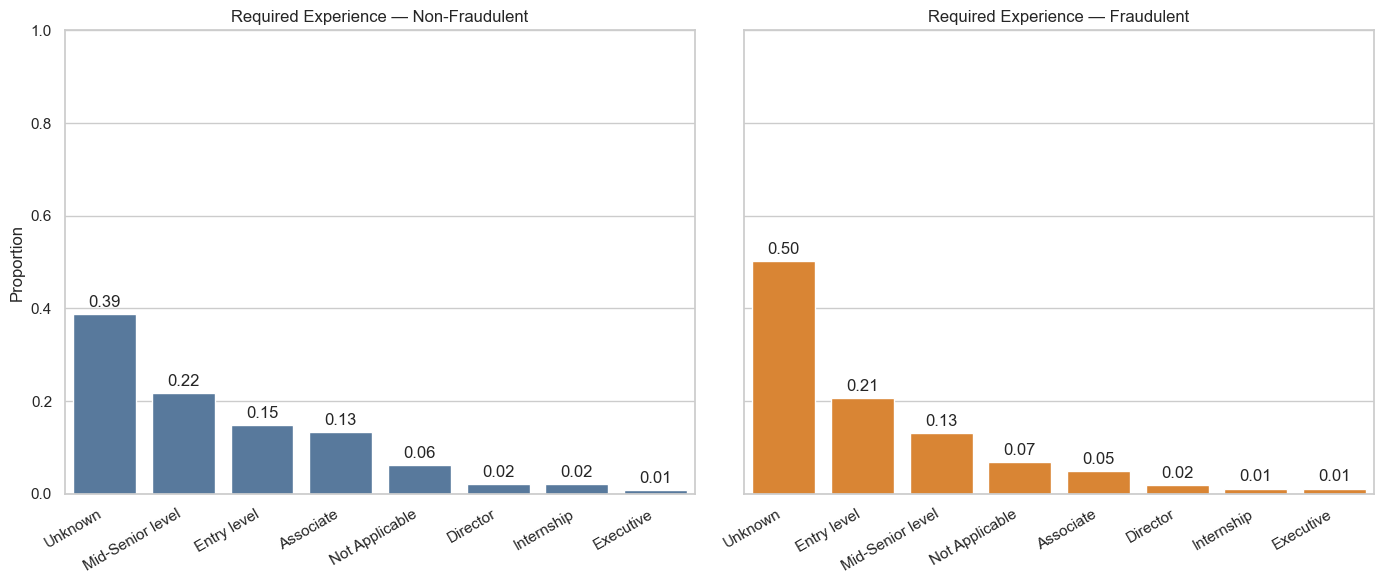

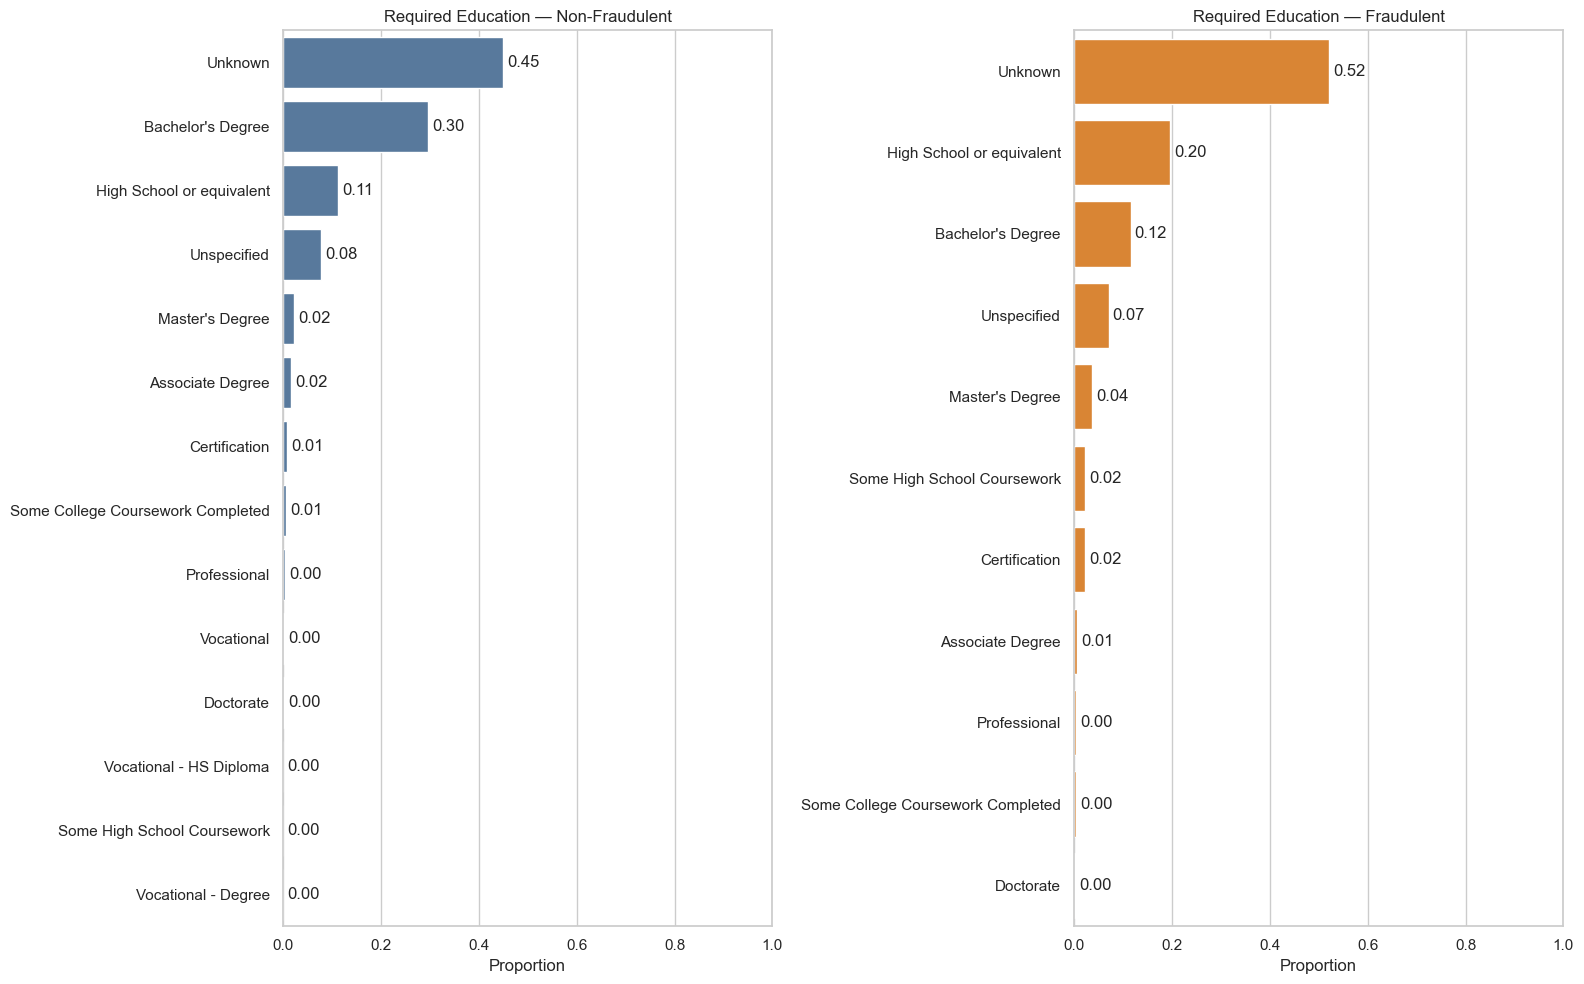

In [34]:
sns.set(style="whitegrid")

def _prep_prop(df, target_col, cat_col):
    """Return two DataFrames with proportions for Non-Fraudulent and Fraudulent groups."""
    d = df.copy()
    d[target_col] = d[target_col].replace({1: "Fraudulent", 0: "Non-Fraudulent",
                                           "t": "Fraudulent", "f": "Non-Fraudulent"})
    d[cat_col] = d[cat_col].fillna("Unknown")

    nonfraud = (d[d[target_col] == "Non-Fraudulent"][cat_col]
                .value_counts(normalize=True)
                .rename_axis(cat_col).reset_index(name="Proportion"))
    fraud = (d[d[target_col] == "Fraudulent"][cat_col]
             .value_counts(normalize=True)
             .rename_axis(cat_col).reset_index(name="Proportion"))
    return nonfraud, fraud

def plot_employment_required_props(df, target_col="fraudulent"):
    # ----- Employment Type (vertical) -----
    nonfraud, fraud = _prep_prop(df, target_col, "employment_type")

    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    sns.barplot(data=nonfraud, x="employment_type", y="Proportion", color="#4C78A8", ax=axes[0])
    axes[0].set_title("Employment Type — Non-Fraudulent")
    axes[0].set_xlabel(""); axes[0].set_ylabel("Proportion"); axes[0].set_ylim(0, 1)
    axes[0].tick_params(axis="x", labelrotation=30); [lbl.set_horizontalalignment("right") for lbl in axes[0].get_xticklabels()]
    for c in axes[0].containers: axes[0].bar_label(c, fmt="%.2f", padding=3)

    sns.barplot(data=fraud, x="employment_type", y="Proportion", color="#F58518", ax=axes[1])
    axes[1].set_title("Employment Type — Fraudulent")
    axes[1].set_xlabel(""); axes[1].set_ylabel(""); axes[1].set_ylim(0, 1)
    axes[1].tick_params(axis="x", labelrotation=30); [lbl.set_horizontalalignment("right") for lbl in axes[1].get_xticklabels()]
    for c in axes[1].containers: axes[1].bar_label(c, fmt="%.2f", padding=3)

    plt.tight_layout(); plt.show()

    # ----- Required Experience (vertical) -----
    nonfraud, fraud = _prep_prop(df, target_col, "required_experience")

    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    sns.barplot(data=nonfraud, x="required_experience", y="Proportion", color="#4C78A8", ax=axes[0])
    axes[0].set_title("Required Experience — Non-Fraudulent")
    axes[0].set_xlabel(""); axes[0].set_ylabel("Proportion"); axes[0].set_ylim(0, 1)
    axes[0].tick_params(axis="x", labelrotation=30); [lbl.set_horizontalalignment("right") for lbl in axes[0].get_xticklabels()]
    for c in axes[0].containers: axes[0].bar_label(c, fmt="%.2f", padding=3)

    sns.barplot(data=fraud, x="required_experience", y="Proportion", color="#F58518", ax=axes[1])
    axes[1].set_title("Required Experience — Fraudulent")
    axes[1].set_xlabel(""); axes[1].set_ylabel(""); axes[1].set_ylim(0, 1)
    axes[1].tick_params(axis="x", labelrotation=30); [lbl.set_horizontalalignment("right") for lbl in axes[1].get_xticklabels()]
    for c in axes[1].containers: axes[1].bar_label(c, fmt="%.2f", padding=3)

    plt.tight_layout(); plt.show()

    # ----- Required Education (horizontal) -----
    nonfraud, fraud = _prep_prop(df, target_col, "required_education")

    # Sort by proportion descending for readability
    nonfraud = nonfraud.sort_values("Proportion", ascending=False)   # ascending so largest ends up at top after barh
    fraud     = fraud.sort_values("Proportion", ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(16, 10), sharex=True)
    sns.barplot(data=nonfraud, y="required_education", x="Proportion", color="#4C78A8", ax=axes[0])
    axes[0].set_title("Required Education — Non-Fraudulent")
    axes[0].set_ylabel(""); axes[0].set_xlabel("Proportion"); axes[0].set_xlim(0, 1)
    for c in axes[0].containers: axes[0].bar_label(c, fmt="%.2f", padding=3)

    sns.barplot(data=fraud, y="required_education", x="Proportion", color="#F58518", ax=axes[1])
    axes[1].set_title("Required Education — Fraudulent")
    axes[1].set_ylabel(""); axes[1].set_xlabel("Proportion"); axes[1].set_xlim(0, 1)
    for c in axes[1].containers: axes[1].bar_label(c, fmt="%.2f", padding=3)

    plt.tight_layout(); plt.show()

plot_employment_required_props(recruitment_df, target_col="fraudulent")


From these 3 barplots, we can see that `employment_type` is not a strong distinguishing factor for fraudulent job advertisements since the ranking of most employment type categories are similar to non-fraudulent job advertisements. For the variables `required_experience` and `required_education`, it seems like a higher proportion of fraudulent job advertisements advertise for entry level positions and high school or equivalent degrees, which are much lower barriers to entry than the fraudulent job advertisements (mid-senior level positions and bachelor's degree).

In [47]:
# Function to strip HTML tags
def strip_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

recruitment_df['description_stripped'] = recruitment_df['description'].fillna("").apply(strip_html)
recruitment_df['company_profile_stripped'] = recruitment_df['company_profile'].fillna("").apply(strip_html)
recruitment_df['requirements_stripped'] = recruitment_df['requirements'].fillna("").apply(strip_html)

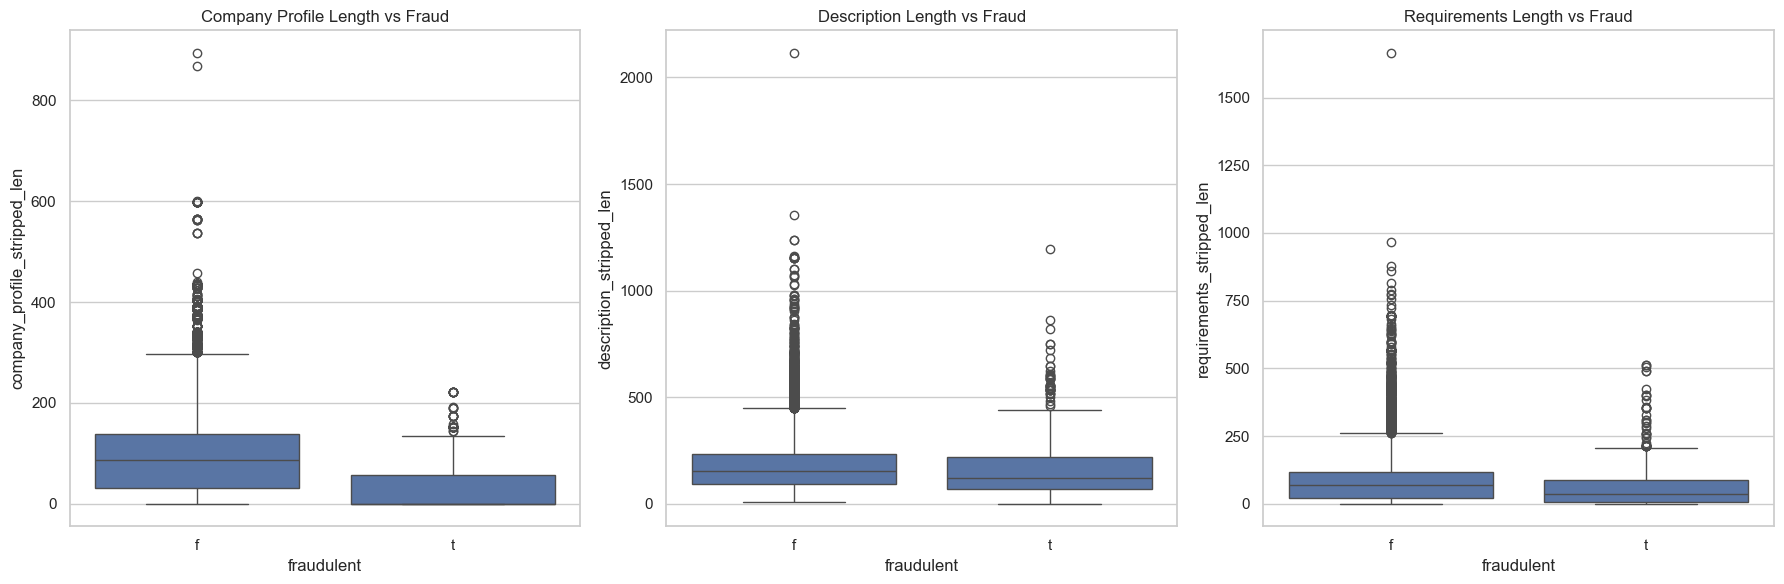

In [48]:
# Compute lengths
recruitment_df['company_profile_stripped_len'] = recruitment_df['company_profile_stripped'].fillna('').str.split().str.len()
recruitment_df['description_stripped_len'] = recruitment_df['description_stripped'].fillna('').str.split().str.len()
recruitment_df['requirements_stripped_len'] = recruitment_df['requirements_stripped'].fillna('').str.split().str.len()

# Set style
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot: company_profile
sns.boxplot(x='fraudulent', y='company_profile_stripped_len', data=recruitment_df, ax=axes[0])
axes[0].set_title("Company Profile Length vs Fraud")

# Boxplot: description
sns.boxplot(x='fraudulent', y='description_stripped_len', data=recruitment_df, ax=axes[1])
axes[1].set_title("Description Length vs Fraud")

# Boxplot: requirements
sns.boxplot(x='fraudulent', y='requirements_stripped_len', data=recruitment_df, ax=axes[2])
axes[2].set_title("Requirements Length vs Fraud")

plt.tight_layout()
plt.show()

We clip extreme lengths (those at the 99th percentile) to make it easier to visualise the differences in the mean length of company profile, description and requirements. We then create summary statistics tables.

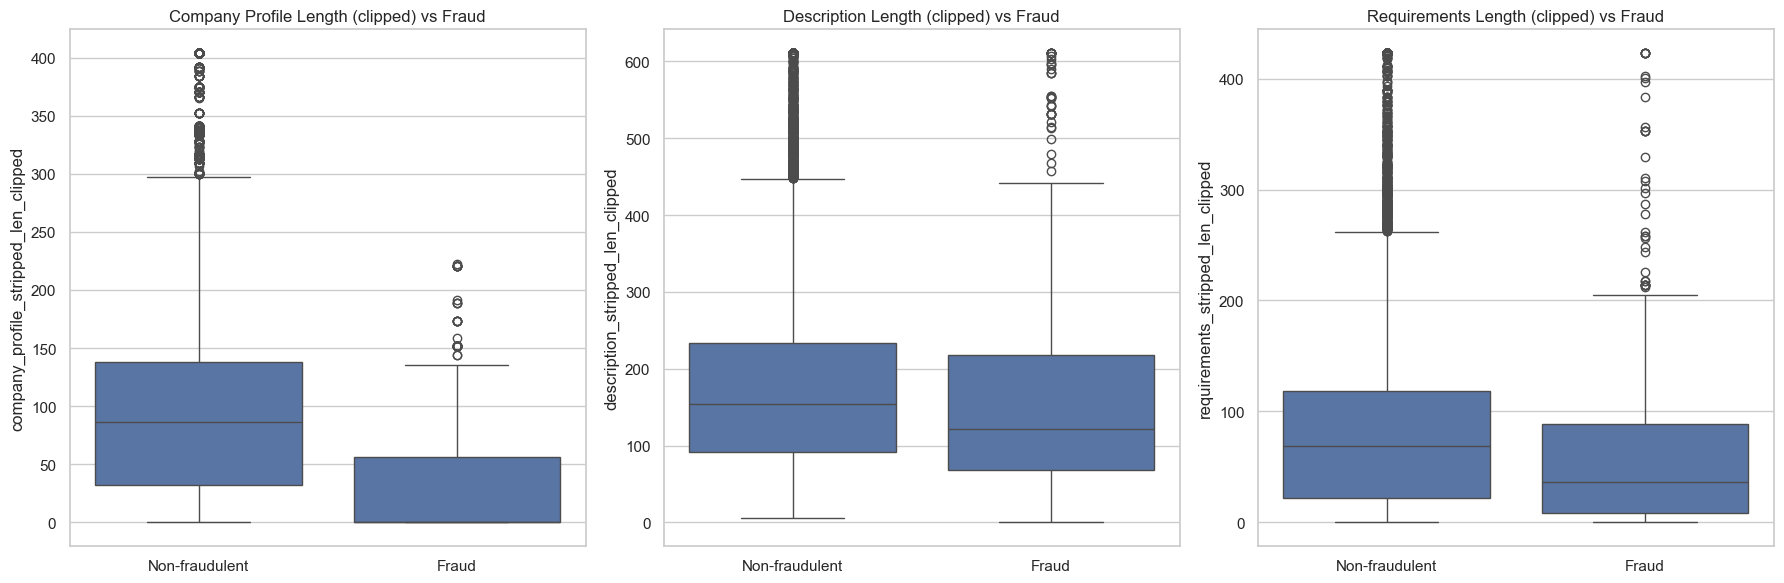


Company Profile Length (words):
                   Q1  Median     Q3
fraud_label                        
Fraud            0.0     0.0   56.0
Non-fraudulent  32.0    86.0  138.0

Description Length (words):
                   Q1  Median     Q3
fraud_label                        
Fraud           68.0   121.0  218.0
Non-fraudulent  92.0   154.0  234.0

Requirements Length (words):
                   Q1  Median     Q3
fraud_label                        
Fraud            8.0    36.0   89.0
Non-fraudulent  22.0    69.0  118.0


In [50]:
# Clip extreme lengths at the 99th percentile for each column
len_cols = ['company_profile_stripped_len', 'description_stripped_len', 'requirements_stripped_len']
for c in len_cols:
    cap = recruitment_df[c].quantile(0.99)
    recruitment_df[c+'_clipped'] = recruitment_df[c].clip(upper=cap)

# (Optional) nicer labels for the class
fraud_map = {'t':'Fraud', 'f':'Non-fraudulent', 1:'Fraud', 0:'Non-fraudulent'}
fraud_label = recruitment_df['fraudulent'].map(fraud_map).fillna(recruitment_df['fraudulent'])

# 3) Boxplots with clipped values
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x=fraud_label, y='company_profile_stripped_len_clipped', data=recruitment_df, ax=axes[0])
axes[0].set_title("Company Profile Length (clipped) vs Fraud"); axes[0].set_xlabel("")

sns.boxplot(x=fraud_label, y='description_stripped_len_clipped', data=recruitment_df, ax=axes[1])
axes[1].set_title("Description Length (clipped) vs Fraud"); axes[1].set_xlabel("")

sns.boxplot(x=fraud_label, y='requirements_stripped_len_clipped', data=recruitment_df, ax=axes[2])
axes[2].set_title("Requirements Length (clipped) vs Fraud"); axes[2].set_xlabel("")

plt.tight_layout()
plt.show()

# Summary tables: Q1 / Median / Q3 for each variable (rows = Fraud/Legit)
def quantile_table(df, var, cls):
    tbl = (df.groupby(cls)[var]
             .quantile([0.25, 0.50, 0.75])
             .unstack(level=1)
             .rename(columns={0.25:'Q1', 0.50:'Median', 0.75:'Q3'}))
    return tbl.round(1)

# Use the same class labels used in the plots
recruitment_df['fraud_label'] = fraud_label

summary_company = quantile_table(recruitment_df, 'company_profile_stripped_len', 'fraud_label')
summary_desc    = quantile_table(recruitment_df, 'description_stripped_len',      'fraud_label')
summary_reqs    = quantile_table(recruitment_df, 'requirements_stripped_len',     'fraud_label')

print("\nCompany Profile Length (words):\n", summary_company)
print("\nDescription Length (words):\n", summary_desc)
print("\nRequirements Length (words):\n", summary_reqs)


From these box plots and referring to the summary statistics table, we can clearly see that non-fraudulent job advertisements have a longer company profile, job description and job requirements than fraudulent job descriptions. These signal that these features - `company_profile`, `description` and `requirements` might be useful features in helping to identify fraudulent job advertisements.

Other than length of company profile, description and requirements, there might be other underlying patterns in the job advertisement's description as well. We explore this using Term Frequency-Inverse Document Frequency. Before doing so, we strip the HTML tags from the description column using the BeautifulSoup library.

In [40]:
# Subset fraudulent descriptions
fraud_descriptions = recruitment_df[recruitment_df['fraudulent'] == 't']['description_stripped'].dropna()

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)  # limit to top 20
X_fraud = vectorizer.fit_transform(fraud_descriptions)

# Get feature names and mean TF-IDF scores
fraud_tfidf_scores = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'tfidf_score': X_fraud.mean(axis=0).A1
}).sort_values(by='tfidf_score', ascending=False)

print(fraud_tfidf_scores)

           word  tfidf_score
19         work     0.200161
18         time     0.133979
5    experience     0.125227
14       skills     0.115607
10     position     0.115497
12      service     0.107459
7       looking     0.107148
1       company     0.106564
2      customer     0.104762
6           job     0.101842
3          data     0.100443
17         team     0.099044
0      business     0.090883
8    management     0.089897
13     services     0.086129
16      support     0.077871
9           new     0.075699
11      project     0.064005
4   engineering     0.061837
15    solutions     0.056499


In [51]:
# Subset non-fraudulent descriptions
non_fraud_descriptions = recruitment_df[recruitment_df['fraudulent'] == 'f']['description_stripped'].dropna()

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)  # limit to top 20
X_non_fraud = vectorizer.fit_transform(non_fraud_descriptions)

# Get feature names and mean TF-IDF scores
non_fraud_tfidf_scores = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'tfidf_score': X_non_fraud.mean(axis=0).A1
}).sort_values(by='tfidf_score', ascending=False)

print(non_fraud_tfidf_scores)

           word  tfidf_score
17         team     0.162949
18         work     0.151330
6    experience     0.123008
8       looking     0.115169
2       company     0.108842
0      business     0.104823
3      customer     0.101017
11          new     0.100662
13        sales     0.092916
5   development     0.091391
7           job     0.089567
9    management     0.084579
14      service     0.083798
19      working     0.080614
16      support     0.080534
4        design     0.080429
12      product     0.079513
10    marketing     0.074619
15     services     0.073782
1        client     0.070904


The TF-IDF scores of high-frequency words in fraudulent and non-fraudulent share a lot of generic business/job vocabulary (e.g. work, experience, skills etc.). We look into N-grams/multi-word phrases instead. 

In [41]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(2,3), max_features=30)
X_fraud = vectorizer.fit_transform(recruitment_df[recruitment_df['fraudulent'] == 't']['description_stripped'])
fraud_ngrams = pd.DataFrame({
    'ngram': vectorizer.get_feature_names_out(),
    'tfidf_score': X_fraud.mean(axis=0).A1
}).sort_values(by='tfidf_score', ascending=False)

print(fraud_ngrams)

                              ngram  tfidf_score
7                  customer service     0.092381
8                        data entry     0.085923
29                        work home     0.082747
6              communication skills     0.068696
14              experience required     0.060805
19                  job description     0.048370
22               project management     0.042384
27                        time time     0.041660
25                     team members     0.033346
20                          oil gas     0.033057
3                    aker solutions     0.029178
15                     gas industry     0.021723
21                 oil gas industry     0.021723
28                     ultra luxury     0.021199
17                  global provider     0.010174
12               engineering design     0.009628
18             industry engineering     0.009549
16         gas industry engineering     0.009549
0                        000 people     0.009489
2                   

In [52]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(2,3), max_features=30)
X_non_fraud = vectorizer.fit_transform(recruitment_df[recruitment_df['fraudulent'] == 'f']['description_stripped'])
non_fraud_ngrams = pd.DataFrame({
    'ngram': vectorizer.get_feature_names_out(),
    'tfidf_score': X_non_fraud.mean(axis=0).A1
}).sort_values(by='tfidf_score', ascending=False)

print(non_fraud_ngrams)

                       ngram  tfidf_score
6           customer service     0.081695
12                 join team     0.047038
22              social media     0.045953
3       communication skills     0.043936
11           ideal candidate     0.041642
10                fast paced     0.039893
28              work closely     0.039844
25              team members     0.037082
20  responsibilities include     0.036683
7                    day day     0.035182
9               fast growing     0.035114
29          years experience     0.034462
8           development team     0.030369
21           right candidate     0.029639
2       business development     0.026904
19         products services     0.022951
23             student loans     0.011572
14              loans credit     0.011487
24      student loans credit     0.011487
4                cost living     0.011487
5               credit cards     0.011395
1            200 cost living     0.011381
16          monthly 200 cost     0

Since the n-gram approach still doesn't distinctively separate fraudulent and non-fraudulent job advertisements, fraudulent job advertisements seem to mimic non-fraudulent ones and perhaps we can look at rule set-based features (Vidros et al. 2017).

In [53]:
currency_regex = r"\$|usd|us\$|dollar|£|€|sgd|s\$\s*|\bper\s*(hour|day|week|month|annum|year)\b"

recruitment_df["url_in_description"] = recruitment_df["description_stripped"].str.contains(r"http|www|\.com|@|\d{3}-\d{3}-\d{4}", na=False)
recruitment_df["consecutive_punct"] = recruitment_df["description_stripped"].str.contains(r"[!?.]{2,}", na=False)
recruitment_df["money_in_title"]   = recruitment_df["title"].str.contains(r"\$|USD|dollar|£|€", case=False, na=False)
recruitment_df["money_in_desc"] = recruitment_df["description_stripped"].str.contains(currency_regex, case=False, na=False)

C:\Users\teomi\AppData\Local\Temp\ipykernel_23252\3877917467.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  recruitment_df["money_in_desc"] = recruitment_df["description_stripped"].str.contains(currency_regex, case=False, na=False)


C:\Users\teomi\AppData\Local\Temp\ipykernel_23252\1232608828.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fraud_bin = recruitment_df["fraudulent"].replace({'t':1,'f':0}).astype(int)


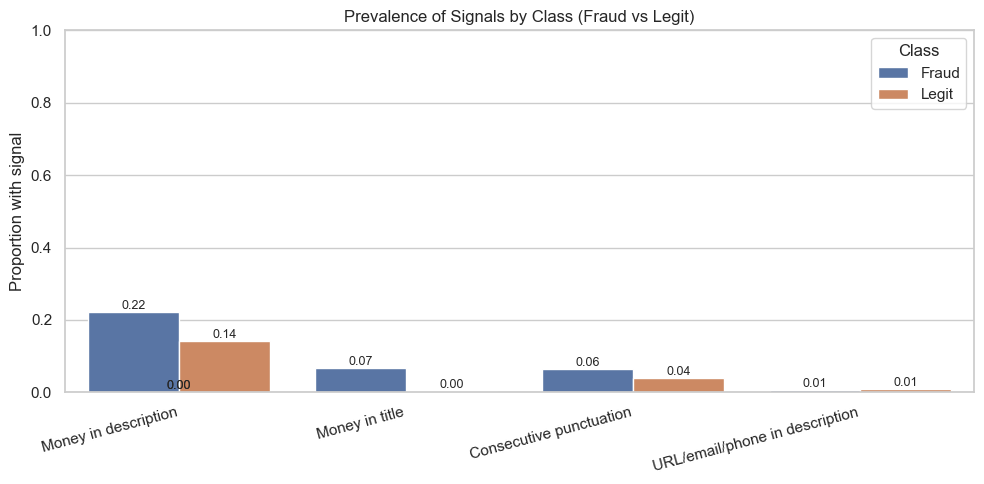

In [54]:
# Map fraud label to 0/1 and to text labels
fraud_bin = recruitment_df["fraudulent"].replace({'t':1,'f':0}).astype(int)
fraud_lbl = fraud_bin.replace({1:"Fraud", 0:"Legit"})
recruitment_df["fraud_bin"]  = fraud_bin
recruitment_df["fraud_label"] = fraud_lbl

# Compute proportions for each signal by class ---
signals = {
    "consecutive_punct": "Consecutive punctuation",
    "money_in_desc":     "Money in description",
    "money_in_title":    "Money in title",
    "url_in_description":       "URL/email/phone in description"
}

# Build a long dataframe of proportions
rows = []
for col, pretty in signals.items():
    grp = recruitment_df.groupby("fraud_label")[col].mean()  # proportion True
    for cls, prop in grp.items():
        rows.append({"Signal": pretty, "Class": cls, "Proportion": prop})
prop_df = pd.DataFrame(rows)

# Sort signals by Fraud proportion to make the plot more readable
order = (prop_df[prop_df["Class"]=="Fraud"]
         .sort_values("Proportion", ascending=False)["Signal"].tolist())
prop_df["Signal"] = pd.Categorical(prop_df["Signal"], categories=order, ordered=True)

# Plot grouped bar chart with proportions (0–1) and labels ---
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.barplot(data=prop_df, x="Signal", y="Proportion", hue="Class")
ax.set_ylim(0, 1)
ax.set_xlabel("")
ax.set_ylabel("Proportion with signal")
ax.set_title("Prevalence of Signals by Class (Fraud vs Legit)")
plt.xticks(rotation=15, ha="right")

# add value labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}",
                (p.get_x() + p.get_width()/2., height),
                ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

Here we see that fraudulent job advertisements seem to have higher proportion of advertisements with money in description and title, together with consecutive punctuations.

In [55]:
recruitment_df.to_csv('recruitment_df_processed.csv', index=False)